In [6]:
import csv
from pathlib import Path
import os.path
import sys

def reading():
    data_folder = Path('./data/')
    csvfile = data_folder / 'dataset_train.csv'
    if not csvfile.is_file():
        return(0)
    data = []
    with open(csvfile) as csv_iterator:
        data_reader = csv.reader(csv_iterator, delimiter=',')
        for row in data_reader:
            data.append(row)
    csv_iterator.close()
    return data
data = reading()
if data != 0:
    headers = data[0]
    del data[0]
stats = ['','Count','Unique','Top','Freq','Mean','Std','Min','25%','50%','75%','Max']
print(len(data))

1600


In [7]:
def is_number(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def all_numeric(index):
    for row in data:
        if row[index] != '' and is_number(row[index]) == False:
            return False
    return True

index = -1
results = []
bonus = False
for column in headers:
    index += 1
    # test if the column is entirely made of numbers
    bNumeric = all_numeric(index)
    if not bNumeric and bonus == False:
        continue
    if column == 'Index' and bonus == True:
        continue
    
    # create an array with all non empty values
    array = []
    for row in data:
        if row[index] != '':
            if bNumeric:
                value = float(row[index])
            else:
                value = row[index]
            array.append(value)
    count = len(array)
    if count == 0:
        continue
    array.sort()

    result = {}
    result[''] = column
    result['Count'] = count
    if bNumeric:
        mean = sum(array) / count
        result['Mean'] = mean
        if count > 1:
            result['Std'] = (sum(list(map((lambda x: (x - mean) ** 2), array))) / (count - 1)) ** 0.5
        result['Min'] = array[0]
        result['25%'] = array[max(int(count * 0.25) - 1, 0)]
        result['50%'] = array[max(int(count * 0.50) - 1, 0)]
        result['75%'] = array[max(int(count * 0.75) - 1, 0)]
        result['Max'] = array[count - 1]
        #bonus
        #bonus
    else:
        #bonus
        uniquearray = list(sorted(set(array)))
        result['Unique'] = len(uniquearray)
        temp = [[array.count(x), x] for x in set(uniquearray)]
        temp.sort()
        tempmax = temp[len(temp) - 1]
        result['Top'] = tempmax[1]
        result['Freq'] = tempmax[0]
        #bonus
    results.append(result)

In [8]:
for y in stats:
    line = y.ljust(7)
    for x in results:
        if y in x.keys():
            input = x[y]
            padding = max(len(x['']) + 1, 14)
            if is_number(input):
                if y == 'Count':
                    line += '{0:.0f}'.format(x[y]).rjust(padding)
                else:
                    line += '{0:.6f}'.format(x[y]).rjust(padding)
            else:
                line += x[y].rjust(padding)
        else:
            line += 'NaN'.rjust(padding)
        #print(line)

In [14]:
array = []
for row in data:
    if row[1] != '':
        array.append(row[1])
uniquearray = list(sorted(set(array)))
result['Unique'] = len(uniquearray)
temp = [[x, array.count(x)] for x in set(uniquearray)]
temp.sort()
print('\nSchool distribution')
for school in temp:
    print(school[1]/len(array))
    print(school[0], school[1], '{0:.0f}'.format(school[1]/len(array)*100) + '%')


School distribution
0.204375
Gryffindor 327 20%
0.330625
Hufflepuff 529 33%
0.276875
Ravenclaw 443 28%
0.188125
Slytherin 301 19%


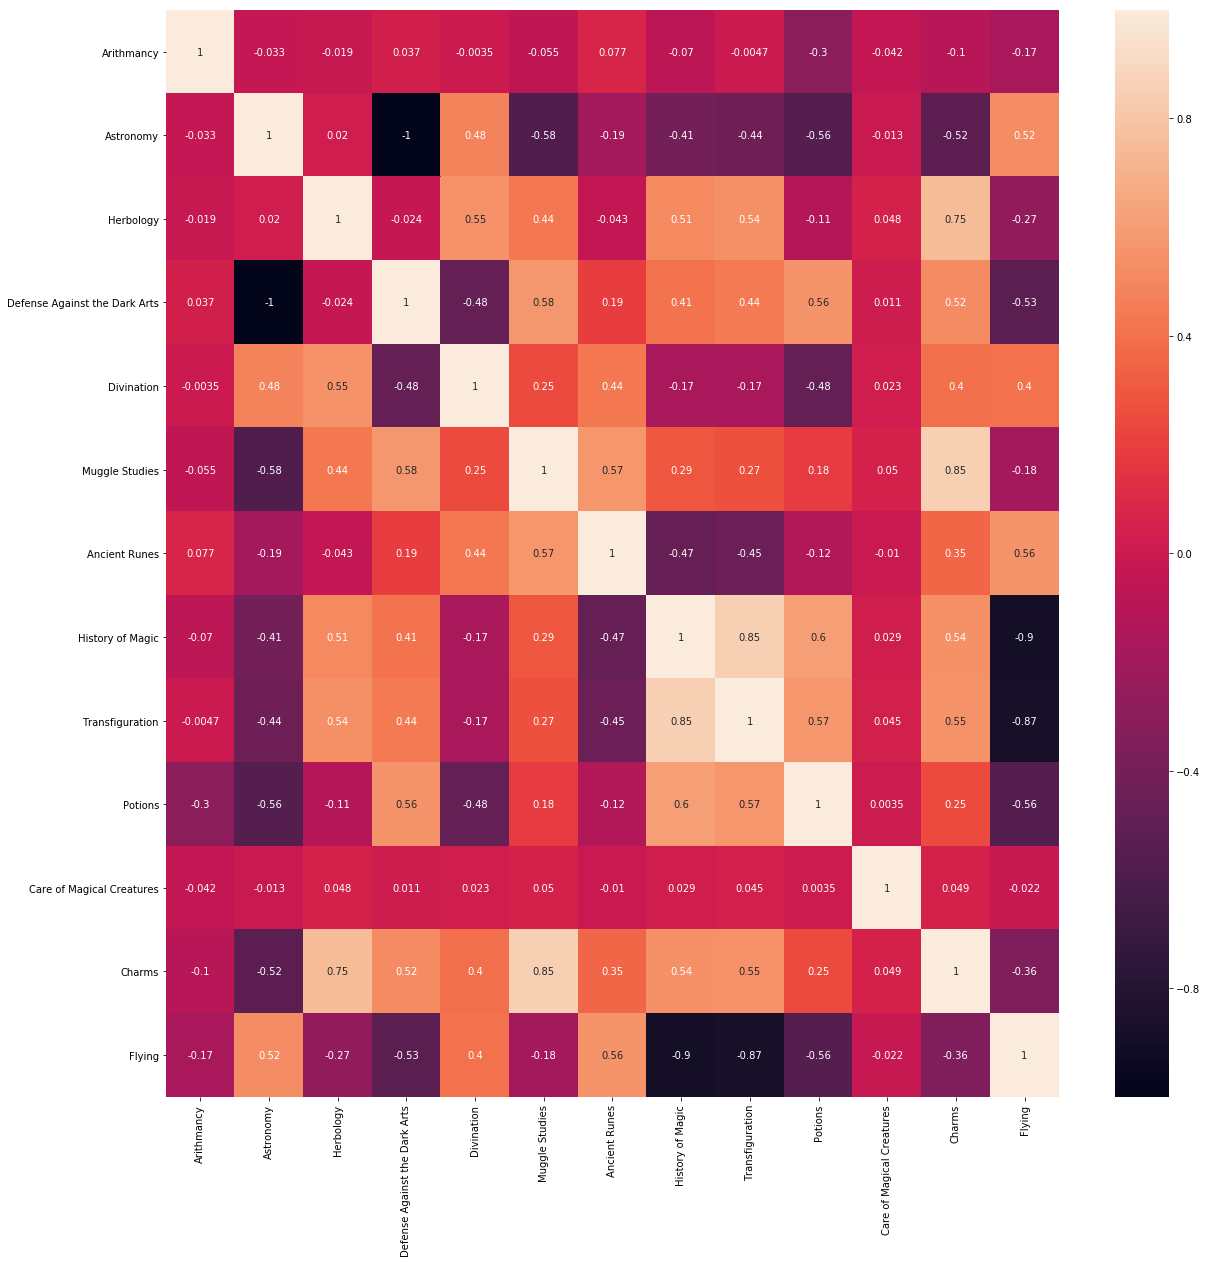

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./data/dataset_train.csv')
df.drop(['Index','Hogwarts House','First Name','Last Name','Birthday','Best Hand'], axis=1, inplace=True)
df = df.replace('', np.nan)
#df.apply(pd.to_numeric, errors='ignore')
df = df.astype('float')
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
# ax = sns.heatmap(corr_matrix, annot=True,
#         xticklabels=corr_matrix.columns,
#         yticklabels=corr_matrix.columns)
# for item in ax.get_xticklabels():
#     item.set_rotation(45)
#plt.show()
sns.heatmap(corr_matrix, annot=True,ax=ax, \
            xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns)